## Bi-Cluster Evaluation

The previous experiments show that while sklearn includes two approaches for finding bi-clusters, they can only find checkerboard structures. Furthermore, the provided evaluation metrices don't work well with bi-clusters. A major flaw is that there is no metric that can evaluate the assignment of overlapping bi-clusters. This notebook aims to find a suitable solution for that.

 ### Tasks
 * #### How to evaluate bi-clustering results?
 * #### Find bi-cluster algorithm for overlapping clusters
 * #### Backward & forward search for measures
 * #### Focus on GO- and Tiger-seq metrics
 * #### Choose & implement measure for cluster quality itself
 * #### Bimax: is there a tool? Who cites it?
 * #### CoExpressDB & GeneFriends: What are the sources? 
 * #### Where to include additional information and how to weight it?

---

## 1. How to evaluate bi-clustering results?

### Biclustering Methods: Biological Relevance and Application in Gene Expression Analysis
* Metric:  
 * Sorensen similarity / Dice coefficient in [0, 1] indicating that the set of columns of the bicluster Xi includes the whole set of samples of type j
 * GO-sig: how significantly set of genes are enriched with a similar GO category using FuncAssociate 2.0. p-Value: probability of a GO category being equally or more frequently observed if one picked the same number of genes as those included in a given bicluster randomly
 * Tiger-Sig: percentage of the biclusters that include genes specific to the studied sample-types. Formula looks for overlap of the gene-sets instead of the sample sets → external benchmarks, depending on quality of databases

### A systematic comparison and evaluation of biclustering methods for gene expression data
* #### metabolic and protein–protein interaction networks: 
one can expect to a certain degree that **genes that participate in the same pathway** respectively form a protein complex also **show similar expression patterns** as discussed in Zien et al. (2000), Ideker et al. (2002), Ihmels et al. (2002). The question here is whether the computed biclusters reflect this correspondence. we model both **pathway information as well as protein interactions in terms of an undirected graph where a node stands for a protein and an edge represents a common reaction in that the two connected proteins participate [...]**. In order to verify whether a given bicluster (G, C) is plausible with respect to the metabolic respectively protein interaction graph, we consider two scores: (1) **the proportion of pairs of genes in G for which there exists no connecting path in the graph** and (2) the **average path length of pairs of genes in G for which such a path exists.**

### Quality Measures for Gene Expression Biclusters
* Bicluster types: Constant values, Constant values on rows or columns, Coherent values on both rows and columns, Coherent evolutions
* Shifting and Scaling Expression Patterns
* Metrics:
 * Variance - only for constant biclusters
 * Mean Squared Residue - The lower the stronger the coherence exhibited by the bicluster, and the better its quality. Inefficient for scaling biclusters
 * Scaling Mean Squared Residue - for scaling biclusters but not shifting ones
 * Relevance Index - only bicluster patterns that maximise the quality are constant biclusters (either on rows or on columns)
 * Pearson’s Correlation Coefficient (PCC): allows both shifting and scaling patterns to be captured. Nevertheless, PCC is not effective for recognising constant biclusters or constant row patterns, since these kinds of patterns would make the denominator zero.
 * Sub-Matrix Correlation Score -  perfect correlated bicluster will satisfy S(I,J) = 0, meaning that the rows or columns of the bicluster are perfectly linearly correlated
 * Spearman’s Biclustering Measure - recognise complex coherence patterns in biclusters, such as shifting and scaling, and also negative correlations. Threshold depends on data set
 
 ### Biological Interpretation
 #### A comparison and evaluation of five biclustering algorithms by quantifying goodness of biclusters for gene expression data
 * number of gene ontology(GO) terms enriched for the biclusters (A systematic comparison and evaluation of biclustering methods for gene expression data)
 * best p-value of the GO term as the significant level value of the bicluster (A qualitative biclustering algorithm for analyses of gene expression data)
 * -> both not appropriate since number of GO terms and the significance levels of enriched GO terms are dependent on bicluster size; some genes may have not been anotated
 * -> weighted enrichment (WE) scoring method and protein-protein interaction network scoring method
 * WE:
 * PPI: (number of interacting genes in cluster)/(number of genes in cluster - genes that don't interact in cluster) based on http://string-db.org/ 

 * #### Find bi-cluster algorithm for overlapping clusters
 * #### Backward & forward search for measures
 * #### Focus on GO- and Tiger-seq metrics
 * #### Choose & implement measure for cluster quality itself
 * #### Bimax: is there a tool? Who cites it?
   * number of biclusters is parameter
   * http://www.kemaleren.com/the-bimax-algorithm.html
   * can only detect boolean expression profiles (which transforms the problem into finding the biggest bicliques in a bipartite graph)
   
 * #### CoExpressDB & GeneFriends: What are the sources? 
  * [CoexpressDB](http://pubmedcentralcanada.ca/pmcc/articles/PMC2238883/pdf/gkm840.pdf):  GPL570 (Human Genome U133 Plus 2.0 Array: 54 614 probesets) and GPL1261 (Mouse Genome 430 2.0 Array: 45 037 probesets) were selected from NCBI GEO. Uses correlation value (Pearson or Fisher) to rank co-expression
  * [GeneFriends](https://link.springer.com/content/pdf/10.1186%2F1471-2164-13-535.pdf): GEO files GSE1 to GSE18120 were downloaded containing 16,916 datasets in total. From these, 3,850 Mus musculus datasets containing 64,849. Only those gene symbols that are present in gene platform file GPL1261 (Affymetrix GeneChip Mouse Genome 430 2.0 Array) were used. Uses vote-counting method
 * #### Where to include additional information and how to weight it?
  * Pathway network inference from gene expression data

<img alt="Screens![Screenshot%20from%202017-11-22%2012-44-54.png](attachment:Screenshot%20from%202017-11-22%2012-44-54.png)hot-from-2017-11-22-12-44-54" src="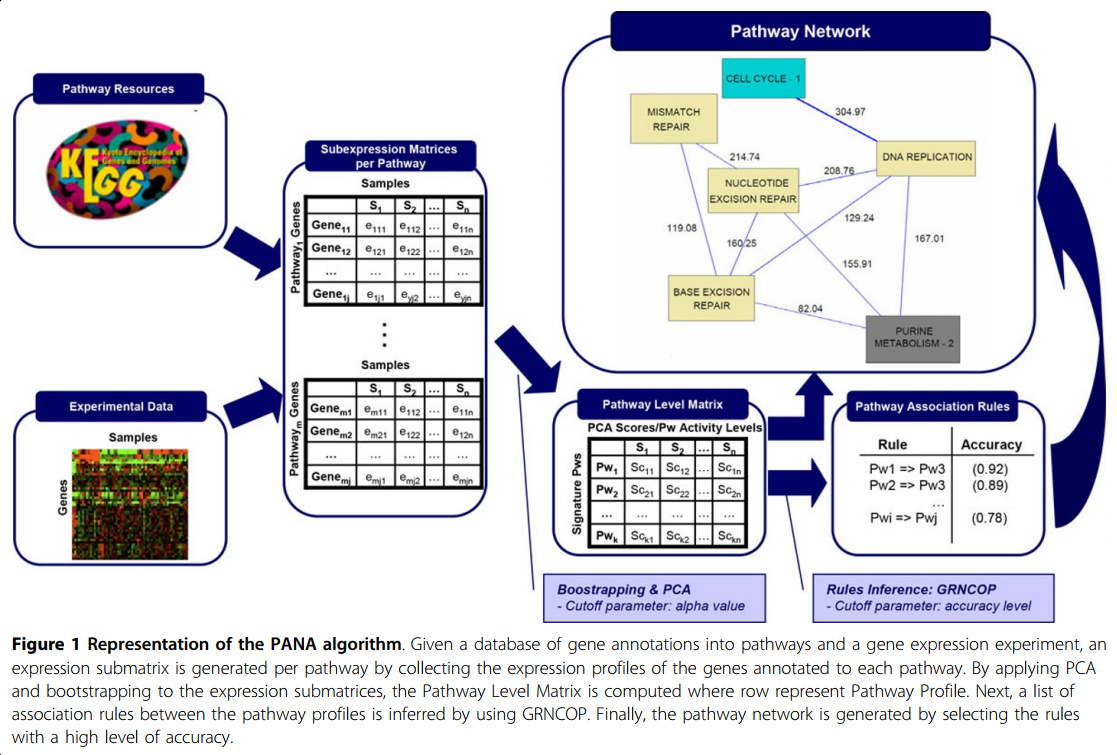">

### Material
* [A comparison and evaluation of five biclustering
algorithms by quantifying goodness of biclusters
for gene expression data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3447720/pdf/1756-0381-5-8.pdf)

# TODO:
* Find bi-cluster algorithm to detect overlapping clusters (in the best case with open source)
* Check out BicOverlapper 2.0: visual analysis for gene expression
* How many pathways for the human are there in the KEGG database?
* What would be nice threshoulds for pathways to include them as additional information
* Is PPI based on pathway data or vice versa?
* Structure mid-term presentation